This is a notebook for SVM model.

##Installations

###Download prepared dataset

split_v3:
https://drive.google.com/file/d/1qHL9NaEADU3fLY9jvxopnXk8vbA7vVFu/view?usp=drive_link

In [1]:
!gdown 1qHL9NaEADU3fLY9jvxopnXk8vbA7vVFu

Downloading...
From: https://drive.google.com/uc?id=1qHL9NaEADU3fLY9jvxopnXk8vbA7vVFu
To: /content/splits_v3.zip
100% 476M/476M [00:04<00:00, 106MB/s]


In [2]:
!unzip splits_v3.zip

Streaming output truncated to the last 5000 lines.
  inflating: splits_v3/train/glass/glass_489.jpg  
  inflating: splits_v3/train/glass/glass_566.jpg  
  inflating: splits_v3/augmented_data/glass/aug_2822_glass_19.jpg  
  inflating: splits_v3/train/glass/glass_591.jpg  
  inflating: splits_v3/train/glass/glass_616.jpg  
  inflating: splits_v3/augmented_data/glass/aug_2816_glass_2.jpg  
  inflating: splits_v3/train/compost/compost_1276.jpg  
  inflating: splits_v3/train/glass/glass_574.jpg  
  inflating: splits_v3/train/compost/compost_1251.jpg  
  inflating: splits_v3/train/compost/compost_1212.jpg  
  inflating: splits_v3/train/compost/compost_1178.jpg  
  inflating: splits_v3/train/glass/glass_465.jpg  
  inflating: splits_v3/train/glass/glass_571.jpg  
  inflating: splits_v3/train/compost/compost_1173.jpg  
  inflating: splits_v3/train/compost/compost_1176.jpg  
  inflating: splits_v3/train/compost/compost_1190.jpg  
  inflating: splits_v3/train/glass/glass_499.jpg  
  inflating: s

###Read files

Since the dataset has been prepared (chosen, resized, splitted), just get each available set (train, validation, test)

In [1]:
import os
import numpy as np
import cv2

The labels for each set are the same, so just reuse it:

In [2]:
labels = sorted(os.listdir('/content/splits_v3/train'))

In [3]:
labels

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

####Get train set

In [4]:
train = dict()

for label in labels:
    img_paths = list(os.listdir('./splits_v3/train/' + label))
    img_paths = map(lambda p: f'./splits_v3/train/{label}/{p}', img_paths)
    train[label] = []
    for path in img_paths:
        img = cv2.imread(path)
        train[label].append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
X_train = []
y_train = []

for encoded_label, label in enumerate(labels):
    y_train += [encoded_label] * len(train[label])
    X_train += train[label]

In [6]:
y_train = np.array(y_train)
X_train = np.array(X_train)

Check train set:

In [7]:
y_train.shape

(3260,)

In [8]:
X_train.shape

(3260, 300, 400, 3)

####Get validation set

In [9]:
validation = dict()

for label in labels:
    img_paths = list(os.listdir('./splits_v3/validation/' + label))
    img_paths = map(lambda p: f'./splits_v3/validation/{label}/{p}', img_paths)
    validation[label] = []
    for path in img_paths:
        img = cv2.imread(path)
        validation[label].append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
X_dev = []
y_dev = []

for encoded_label, label in enumerate(labels):
    y_dev += [encoded_label] * len(validation[label])
    X_dev += validation[label]

In [11]:
y_dev = np.array(y_dev)
X_dev = np.array(X_dev)

Check validation set:

In [12]:
y_dev.shape

(699,)

In [13]:
X_dev.shape

(699, 300, 400, 3)

####Get test set

In [14]:
test = dict()

for label in labels:
    img_paths = list(os.listdir('./splits_v3/test/' + label))
    img_paths = map(lambda p: f'./splits_v3/test/{label}/{p}', img_paths)
    test[label] = []
    for path in img_paths:
        img = cv2.imread(path)
        test[label].append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
X_test = []
y_test = []

for encoded_label, label in enumerate(labels):
    y_test += [encoded_label] * len(test[label])
    X_test += test[label]

In [16]:
y_test = np.array(y_test)
X_test = np.array(X_test)

Check test set:

In [17]:
y_test.shape

(699,)

In [18]:
X_test.shape

(699, 300, 400, 3)

##Feature Engineering

Using PCA technique for Feature Engineering

In [20]:
from sklearn.decomposition import PCA

Gray scale the image for reducing dimensionality, but there're some drawbacks

In [21]:
def gray_scale(X):
  gray = []
  for i in X:
    img = cv2.cvtColor(i, cv2.COLOR_RGB2GRAY)
    gray.append(img)
  gray = np.array(gray)
  return gray

In [22]:
X_train_gray = gray_scale(X_train)

Flatten the gray image for reducing dimensionality, but there're some drawbacks

In [23]:
def flatten(X):
    return X.reshape((X.shape[0], -1))

In [24]:
X_train_flatten = flatten(X_train_gray)

Just fit the PCA on the flatten image of traning set

In [25]:
pca = PCA(100).fit(X_train_flatten)

Save pca model

In [63]:
import pickle

In [65]:
if not os.path.isfile('pca_100.pkl'):
        pickle.dump(pca, open('pca_100.pkl', 'wb'))

Transform each X's set based on pca model

In [26]:
X_train_pca = pca.transform(X_train_flatten)

In [27]:
del X_train_gray, X_train, X_train_flatten

In [29]:
X_dev_gray = gray_scale(X_dev)

In [30]:
X_dev_flatten = flatten(X_dev_gray)

In [31]:
X_dev_pca = pca.transform(X_dev_flatten)

In [32]:
del X_dev_gray, X_dev, X_dev_flatten

In [33]:
X_test_gray = gray_scale(X_test)

In [34]:
X_test_flatten = flatten(X_test_gray)

In [35]:
X_test_pca = pca.transform(X_test_flatten)

In [36]:
del X_test_gray, X_test, X_test_flatten

##Hyperparameter Tuning

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

Concatenate train set and validation set for Cross-validation

In [54]:
X_traindev = np.concatenate([X_train_pca, X_dev_pca], axis = 0)
y_traindev = np.concatenate([y_train, y_dev], axis = 0)

In [55]:
param_grid = {'C': np.logspace(-2, 7, 10),
              'gamma': np.logspace(-9, -3, 7),
              'kernel': ['rbf']}

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.1275, random_state=42)

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=cv)

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 3 folds for each of 70 candidates, totalling 210 fits
[CV 1/3] END ...C=0.01, gamma=1e-09, kernel=rbf;, score=0.154 total time=   1.5s
[CV 2/3] END ...C=0.01, gamma=1e-09, kernel=rbf;, score=0.154 total time=   1.4s
[CV 3/3] END ...C=0.01, gamma=1e-09, kernel=rbf;, score=0.154 total time=   1.4s
[CV 1/3] END ...C=0.01, gamma=1e-08, kernel=rbf;, score=0.154 total time=   1.4s
[CV 2/3] END ...C=0.01, gamma=1e-08, kernel=rbf;, score=0.154 total time=   2.4s
[CV 3/3] END ...C=0.01, gamma=1e-08, kernel=rbf;, score=0.154 total time=   1.8s
[CV 1/3] END ...C=0.01, gamma=1e-07, kernel=rbf;, score=0.154 total time=   1.5s
[CV 2/3] END ...C=0.01, gamma=1e-07, kernel=rbf;, score=0.154 total time=   1.4s
[CV 3/3] END ...C=0.01, gamma=1e-07, kernel=rbf;, score=0.154 total time=   1.5s
[CV 1/3] END ...C=0.01, gamma=1e-06, kernel=rbf;, score=0.154 total time=   1.8s
[CV 2/3] END ...C=0.01, gamma=1e-06, kernel=rbf;, score=0.154 total time=   1.7s
[CV 3/3] END ...C=0.01, gamma=1e-06, kernel=rbf

The best parameters are {'C': 10.0, 'gamma': 1e-08, 'kernel': 'rbf'} with a score of 0.49

##Create a model

In [56]:
clf = SVC(C=10, gamma=1e-08, kernel='rbf')

In [57]:
clf.fit(X_train_pca, y_train)

SVC(C=10, gamma=1e-08)

##Prediction

In [58]:
y_pred = clf.predict(X_test_pca)

##Evaluation Metrics

In [59]:
from sklearn import metrics

In [60]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Classification report for classifier SVC(C=10, gamma=1e-08):
              precision    recall  f1-score   support

           0       0.46      0.49      0.48        93
           1       0.49      0.51      0.50       109
           2       0.44      0.40      0.42        88
           3       0.50      0.52      0.51       102
           4       0.42      0.49      0.45        98
           5       0.48      0.44      0.46       101
           6       0.40      0.35      0.37       108

    accuracy                           0.46       699
   macro avg       0.46      0.46      0.46       699
weighted avg       0.46      0.46      0.46       699




Confusion matrix:
[[46  4  7  3 19  5  9]
 [12 56  4  4 10 11 12]
 [ 3 10 35 13  9  7 11]
 [ 8  6  6 53 10  5 14]
 [12  6 12  7 48 11  2]
 [12  8  6 13  8 44 10]
 [ 7 24 10 12  9  8 38]]


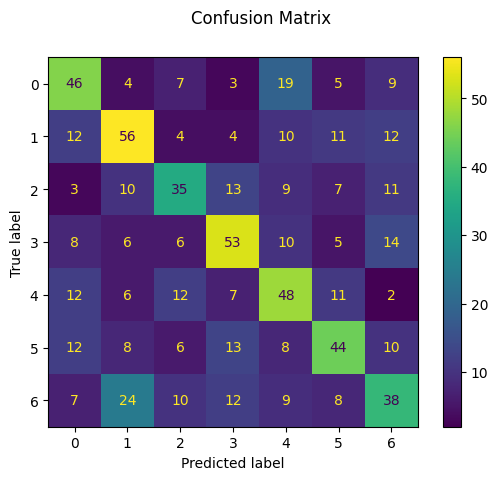

In [61]:
import matplotlib.pyplot as plt
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [62]:
labels

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']